<a href="https://colab.research.google.com/github/hongnhung910/Image-Filters/blob/main/read_display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**SETUP**

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image, ImageEnhance

In [ ]:
path_project = os.path.join(os.path.realpath(''),'gdrive/MyDrive/Image Processing/Image-Filters-main')
os.chdir(path_project)

In [ ]:
import readwriteImg
import contrast
import bright
import cartoonizing
import blur
import sharpen
import noise

##**Read Image**

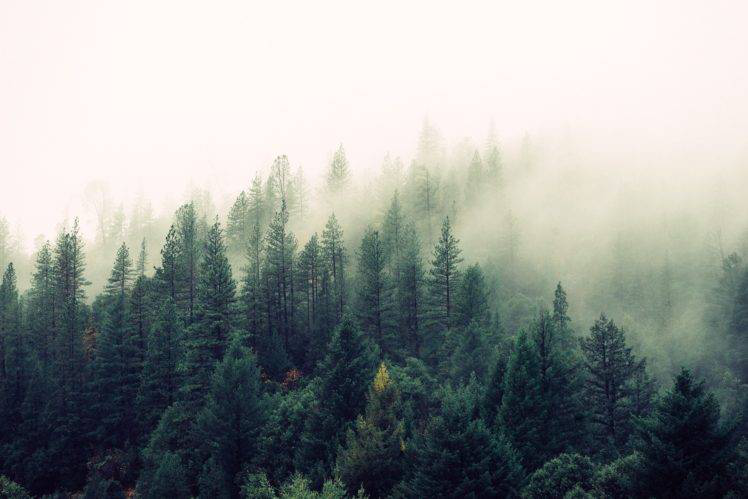

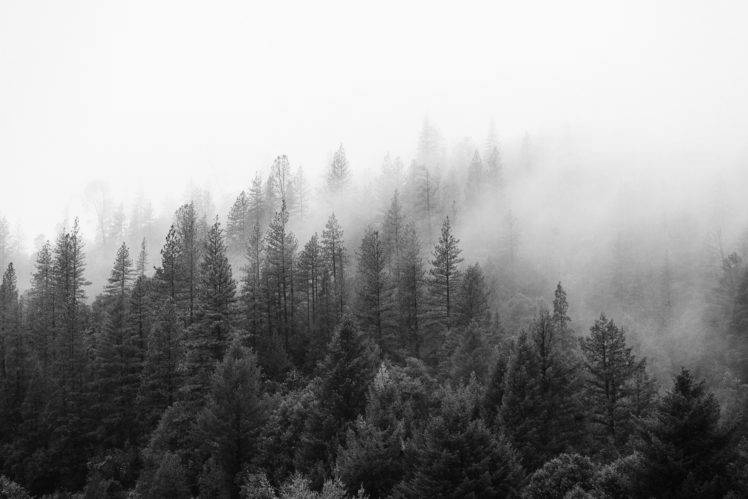

In [ ]:
#path to location of image
path = os.path.join(os.path.realpath(''),'sample_images')

img_dir = path + "/landscape-mist-pine_trees.jpg"

image = io.imread(img_dir)
image_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#final_frame = cv2.hconcat((image_gray, image_color))  
cv2_imshow(image_color)
cv2_imshow(image_gray)


##**Brightness**

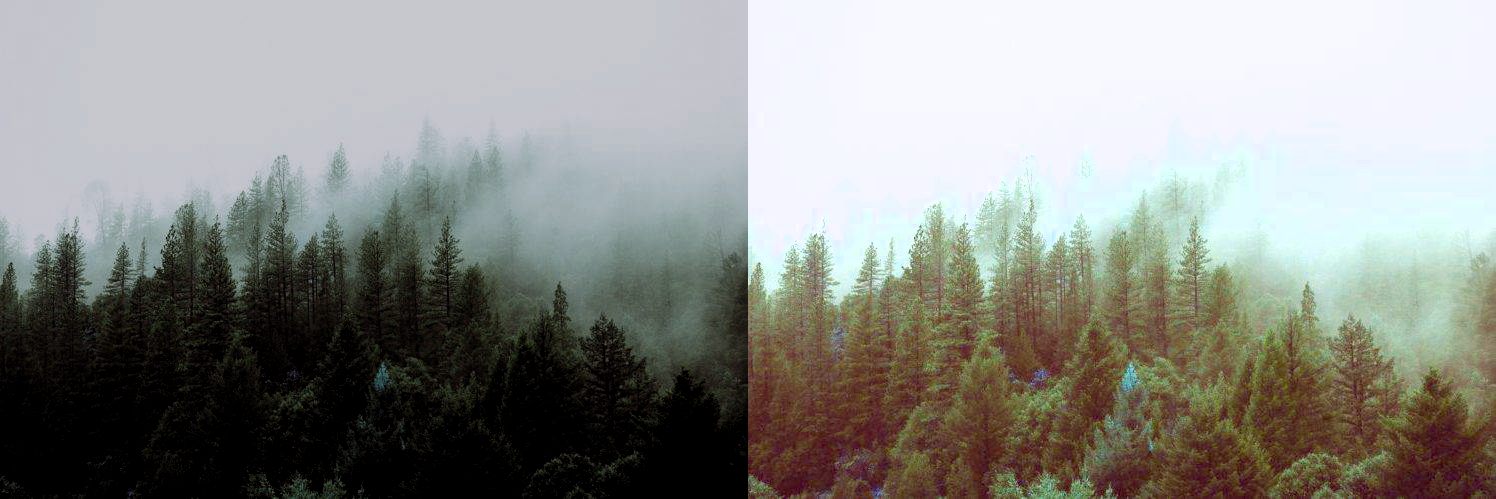

In [ ]:
bright_img = image_color
#adjust brightness
dark_img = bright.bright(bright_img ,-50)
bright_img  = bright.bright(bright_img ,50)
image = bright_img
bright_frame = cv2.hconcat((dark_img, bright_img ))  
cv2_imshow(bright_frame)

##**Contrast**

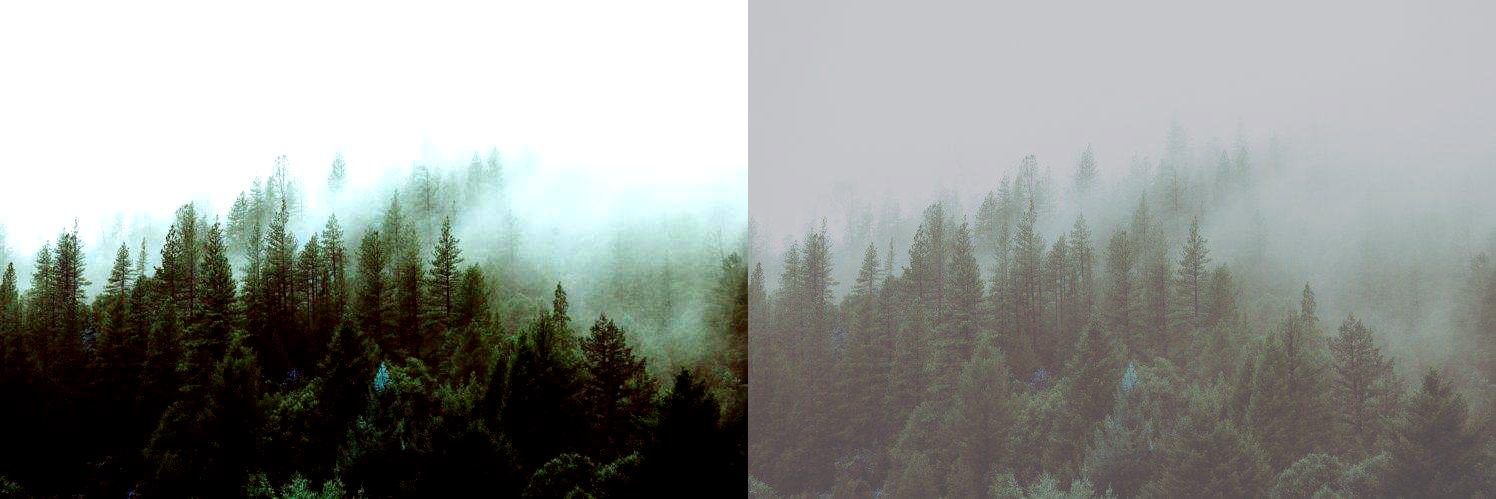

In [ ]:
from PIL import Image, ImageEnhance
im = Image.open(img_dir)
#im = cv2.imread("sample_images/landscape-mist-pine_trees.jpg")
contrast_img_up = contrast.contrast(im,1.5)
contrast_img_down = contrast.contrast(im,0.5)
contrast_img_up.save('sample_images/contrast_increase.jpg')
contrast_img_down.save('sample_images/contrast_decrease.jpg')

cv2_imshow(cv2.hconcat((io.imread('sample_images/contrast_increase.jpg'),io.imread('sample_images/contrast_decrease.jpg') )) )

In [ ]:

hist = contrast.compute_hist(image).ravel() 

new_hist = contrast.equal_hist(hist) 

 

h, w = image.shape[:2] 

for i in range(h): 

   for j in range(w): 

       image[i,j] = new_hist[image[i,j]] 

img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV) 

img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) 

# convert the YUV image back to RGB format 

img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) 
cv2_imshow(img_output)

##**Bluring**

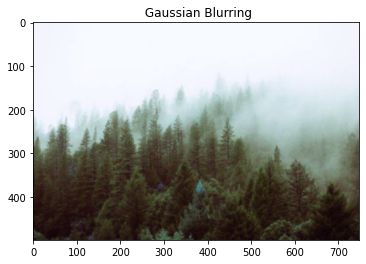

In [ ]:
blur.Gaussian_filter(image_color)

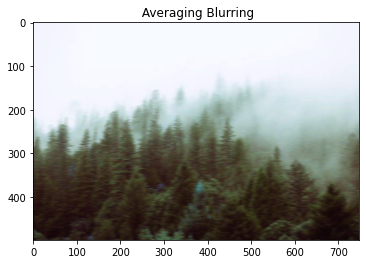

In [ ]:
blur.normalized_box_filter(image_color)

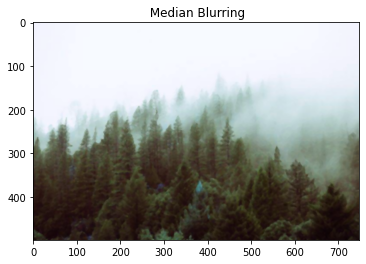

In [ ]:
blur.median_filter(image_color)

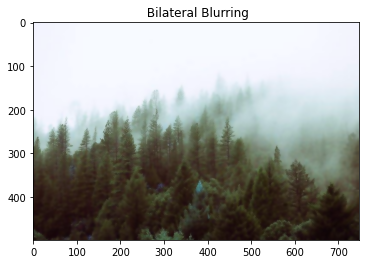

In [ ]:
blur.bilateral_filter(image_color)

##**Sharpening**

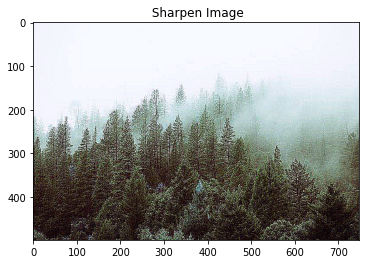

In [ ]:
sharpen.sharpening_filter(image_color)

## **Add noise/ Denoise**

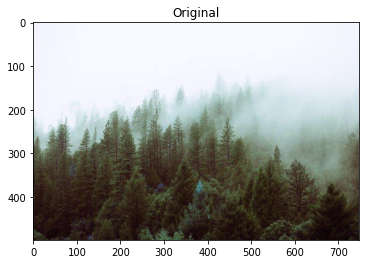

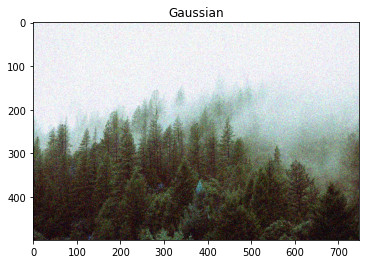

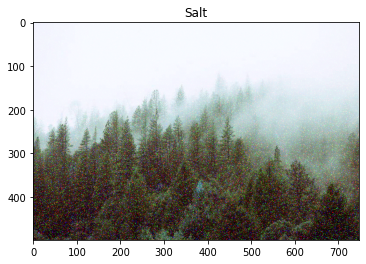

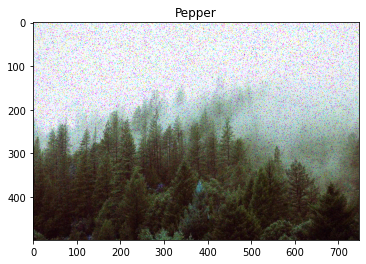

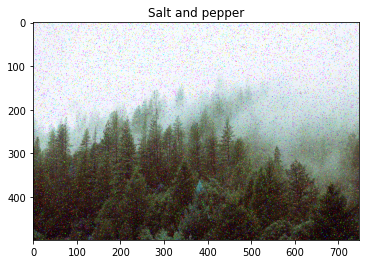

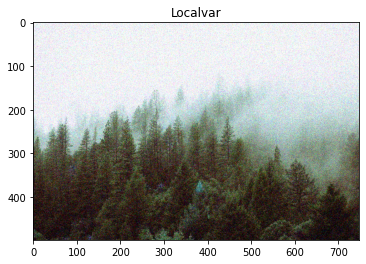

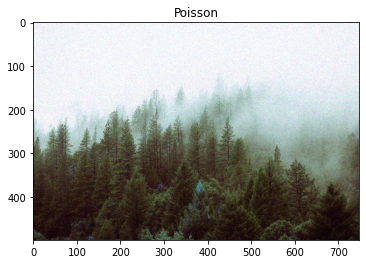

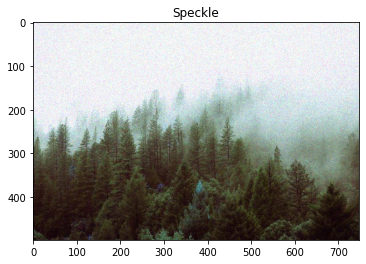

In [ ]:
noise.add_noise(image_color)

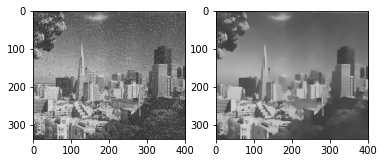

In [ ]:
noise_img = io.imread('sample_images/noise_img.jpg')
noise.denoise_grayimg(noise_img)


##**Cartoonizing**

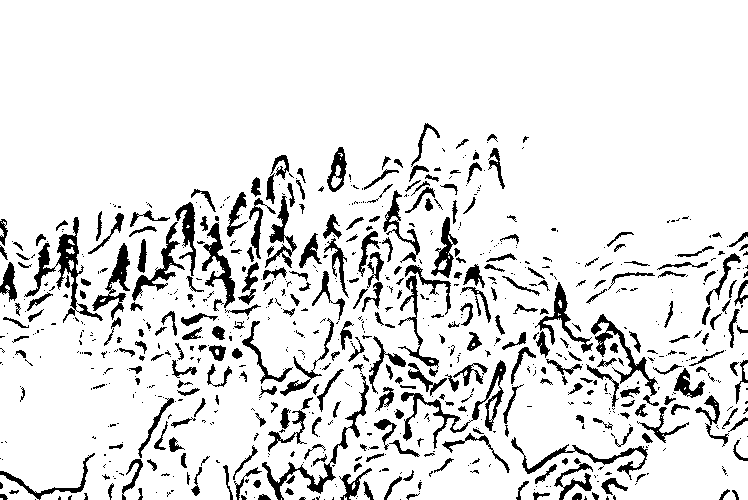

In [ ]:
cartoonizing.edge_detection(image_color)

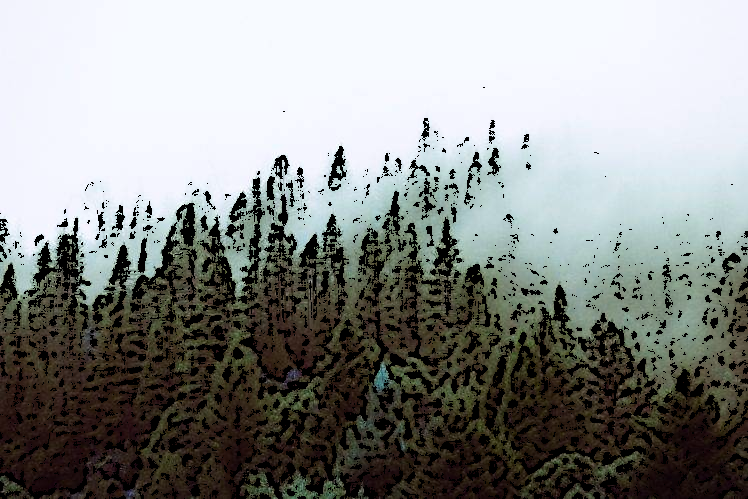

In [ ]:
img_cartoon = cartoonizing.render(img_dir)
cv2_imshow(img_cartoon)

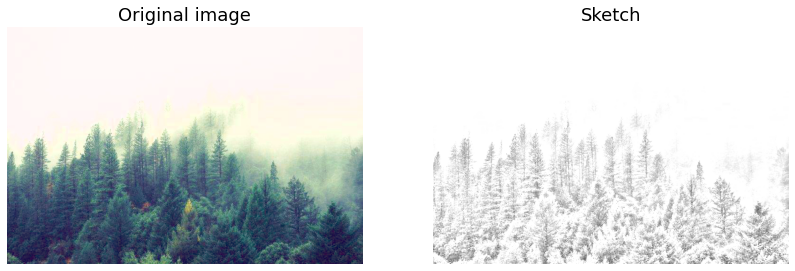

In [ ]:
cartoonizing.sketch(image)


##**Warming Filter**

In [ ]:
from colorbalance import WarmingFilter, CoolingFilter
print('Cooling Effect Applied.')

y = CoolingFilter()
Cool = y.render(image_color)

frame = cv2.hconcat((image_color, Cool )) 
cv2_imshow(frame) 

print('Warming Effect Applied.')
w = WarmingFilter()
warm = w.render(image_color)
frame = cv2.hconcat((image_color, warm )) 
cv2_imshow(frame)

Output hidden; open in https://colab.research.google.com to view.